In [9]:
#https://github.com/pomber/covid19
import numpy as np
import pandas as pd
from fbprophet import Prophet

from scipy import optimize
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate

In [10]:
#casos = np.array([1,0,0,1,0,0,0,1,5,5,6,6,5,4,35,9,20,23,79,34,57,137,193,349,208,368])

hoje = str(datetime.datetime.today().date())
# hoje = str(datetime.datetime.strptime('2020-03-25', "%Y-%m-%d").date())
pd.options.display.float_format = '{:,}'.format
df = pd.read_csv('corona.csv', sep=';', decimal=',')
df.tail()

,ds,casos,mortes
30,2020-03-27,432,15
31,2020-03-28,487,22
32,2020-03-29,352,22
33,2020-03-30,374,27
34,2020-03-31,1087,38


In [11]:
df_casos = df[['ds','casos']]
df_casos['y'] = df['casos']
df_casos.drop(columns='casos', inplace=True)
# df_casos

df_mortes = df[['ds','mortes']]
df_mortes['y'] = df['mortes']
df_mortes.drop(columns='mortes', inplace=True)
df_mortes.tail()

,ds,y
30,2020-03-27,15
31,2020-03-28,22
32,2020-03-29,22
33,2020-03-30,27
34,2020-03-31,38


In [12]:
m_casos = Prophet(yearly_seasonality=False, daily_seasonality=True)
m_casos.fit(df_casos)

m_mortes = Prophet(yearly_seasonality=False, daily_seasonality=True)
m_mortes.fit(df_mortes)

In [13]:
future_casos = m_casos.make_future_dataframe(periods=20, freq='D', include_history=False)
future_mortes = m_mortes.make_future_dataframe(periods=20, freq='D', include_history=False)

In [14]:
print('########## CASOS ###########')
forecast_casos = m_casos.predict(future_casos)
print(forecast_casos[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

print('\n########## MORTES ###########')
forecast_mortes = m_mortes.predict(future_mortes)
print(forecast_mortes[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

########## CASOS ###########
           ds              yhat        yhat_lower        yhat_upper
15 2020-04-16 758.6999574739068 592.0938333191631 925.3611413842596
16 2020-04-17 792.3170999145973 619.5138969947184  949.180123008318
17 2020-04-18 776.1322814467546 608.1869350921884 938.4791480906675
18 2020-04-19 792.1444712468476 640.8461044458711 962.7516305076638
19 2020-04-20 789.3552422710078 623.2793084377554 957.1494439778623

########## MORTES ###########
           ds               yhat         yhat_lower         yhat_upper
15 2020-04-16 29.510004963210076 22.093997982864053  37.13586363486522
16 2020-04-17   29.1110773254711   22.1349544636783 36.317090939242185
17 2020-04-18 31.111959220322053  24.02622935634083  37.98421630974022
18 2020-04-19 31.112982561991963 24.535295842618073  37.50126492483495
19 2020-04-20   32.5138858277669 25.543356900571357   39.4888149959409


In [4]:
# m.plot(forecast)

# print(tabulate(forecast_casos[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], headers=['idx','ds', 'yhat', 'yhat_lower', 'yhat_upper'], floatfmt=".0f"))


In [5]:
print('Casos')
# m.plot_components(forecast_casos)
print('Mortes')
m_mortes.plot_components(forecast_mortes)

Casos
Mortes


NameError: name 'm_mortes' is not defined

In [83]:
print('\n########## CASOS ###########')
print(forecast_casos[forecast_casos.ds == hoje].yhat)

print('\n########## MORTES ###########')
print(forecast_mortes[forecast_mortes.ds == hoje].yhat)


########## CASOS ###########
0   469.9380173356658
Name: yhat, dtype: float64

########## MORTES ###########
0   18.182334884864197
Name: yhat, dtype: float64


In [84]:
# from fbprophet.plot import plot_plotly
# import plotly.offline as py
# py.init_notebook_mode()

# fig = plot_plotly(m, forecast)  # This returns a plotly Figure
# py.iplot(fig)

In [85]:
p = forecast_casos.loc[:,['ds','yhat']]
p['y'] = p.loc[:,'yhat']
t = df_casos.append(p[['ds','y']], ignore_index=True).round(0)

p = forecast_mortes.loc[:,['ds','yhat']]
p['y'] = p.loc[:,'yhat']
s = df_mortes.append(p[['ds','y']], ignore_index=True).round(0)


t['ds'] = t['ds'].astype('datetime64[ns]')
t.rename(columns={"y": "y_casos"}, inplace= True)
t['y_casos_acum'] = t['y_casos'].cumsum().round(0)
t['y_mortes'] = s['y']
t['y_mortes_acum'] = t['y_mortes'].cumsum().round(0)

# t.reset_index(inplace=True, drop=True)

# t_casos = t_casos.round(1)

# print(tabulate(t[t.columns], headers=[t.columns], floatfmt=".0f"))
t.tail()

,ds,y_casos,y_casos_acum,y_mortes,y_mortes_acum
50,2020-04-16,759.0,"15,670.0",30.0,586.0
51,2020-04-17,792.0,"16,462.0",29.0,615.0
52,2020-04-18,776.0,"17,238.0",31.0,646.0
53,2020-04-19,792.0,"18,030.0",31.0,677.0
54,2020-04-20,789.0,"18,819.0",33.0,710.0


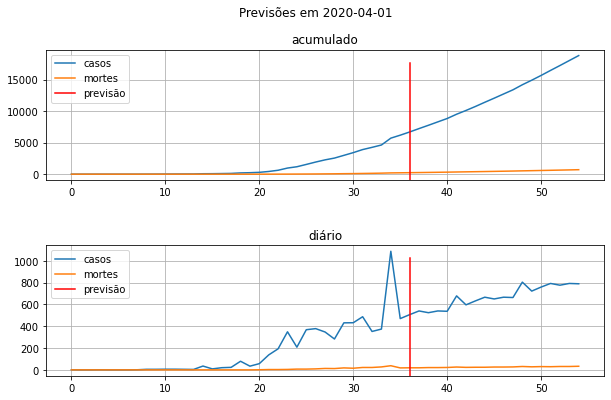

In [86]:
# plt.figure(figsize=(10,6), dpi=80)
# fig, ax = plt.subplots()
# fig1, ax1 = plt.subplots()
# ax.plot(t.index, 'o')
# ax1.plot(t['y_casos_acum'], 'o')
# ax.set_title('dddddd')
# ax1.set_title(t['y_mortes_acum'])
# plt.show()

x = t.index
corte = t.loc[t.ds == str(hoje)].index[0]+1

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
fig.suptitle('Previsões em ' + hoje)
fig.subplots_adjust(hspace = 0.5)
ax1.set_title('acumulado')
ax1.plot(x, t['y_casos_acum'], label = 'casos')#, linewidths = 0.01)
ax1.plot(x, t['y_mortes_acum'], label = 'mortes')
ax1.grid()
ax1.axvline(x=corte, ymin=0, ymax=0.9, color = 'red', label = 'previsão')
ax1.legend()

ax2.set_title('diário')
ax2.plot(x, t['y_casos'], label = 'casos')
ax2.plot(x, t['y_mortes'], label = 'mortes')
ax2.grid()
ax2.axvline(x=corte, ymin=0, ymax=0.9, color = 'red', label = 'previsão')
ax2.legend()

plt.show()

In [87]:

t.to_csv('previsoes/previsaoBrasil_' + hoje + '.csv', sep=',', decimal=',', index = False)
fig.savefig('previsoes/previsaoBrasil_' + hoje + '.png')

In [88]:
t[t.ds == hoje]

,ds,y_casos,y_casos_acum,y_mortes,y_mortes_acum
35,2020-04-01,470.0,"6,187.0",18.0,219.0


In [97]:
amanha = str(datetime.datetime.today().date() + datetime.timedelta(days=1))
t[t.ds == amanha]

,ds,y_casos,y_casos_acum,y_mortes,y_mortes_acum
36,2020-04-02,506.0,"6,693.0",19.0,238.0


'2020-04-02'